In [1]:
from caiman_online import analysis, plot, utils
from glob import glob
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import matplotlib as mpl
import scipy

%load_ext autoreload
%autoreload 2

sns.set_style('ticks',{'axes.spines.right': False, 'axes.spines.top': False}) # removes annoying top and right axis
sns.set_context('notebook') # can change to paper, poster, talk, notebook
pd.set_option('display.max_columns',10) # limits printing of dataframes

mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['savefig.dpi'] = 300 # default resolution for saving images in matplotlib
mpl.rcParams['savefig.format'] = 'png' # defaults to png for saved images (SVG is best, however)
mpl.rcParams['savefig.bbox'] = 'tight' # so saved graphics don't get chopped
mpl.rcParams['figure.constrained_layout.use'] = True # so I don't have to keep saying contrainsted_layout = True in all subplots
mpl.rcParams['image.cmap'] = 'viridis'

%config InlineBackend.figure_format = 'retina' # doesn't work in vscode

In [2]:
def ci(data, confidence=0.95):
    # only works for 1D data, or a single point on a line
    mean = np.mean(data)
    err = scipy.stats.sem(data)
    n = data.size
    h = err * scipy.stats.t.ppf((1+confidence)/2, n-1)
    high = mean + h
    low = mean - h
    return low, high

def mean_traces_ci(data, ax=None):
    if ax is None:
        ax=plt.gca()
#     cis = []
#     for i in range(data.shape[1]):
#         cis.append(ci(data[:,i]))
#     cis = np.array(cis).T
    cis = traces_ci(data)
    ax.plot(data.mean(axis=0), color='k', lw=2)
    ax.fill_between(np.arange(data.shape[1]), cis[0,:], cis[1,:], alpha=0.6)
    

def traces_ci(traces, *args, **kwargs):
    """Does CI for a time series."""
    func = lambda x: ci(x, *args, **kwargs)
    return np.apply_along_axis(func, 0, traces)

In [36]:
dat = traces[1,:,:]
cis = np.apply_along_axis(ci, 0, dat)

In [3]:
user_name = 'Mora'
date = '20200802'
mouse = 'MBOT5_419'
exp_name = 'ori'

nplanes = 3

# this might vary depending on how everything is set up
# tif_folder = os.path.join('D:\\', user_name, date, mouse, exp_name)
tif_folder = 'E:/caiman_scratch/ori'
os.chdir(tif_folder)

In [4]:
traces = []
for plane in range(nplanes):
    js_this_plane = glob(f'./out/*plane{plane}*.json')
    traces.append(analysis.concat_chunked_data(js_this_plane, normalizer='scale'))

traces = np.concatenate(traces, axis=1)

C:\Users\Will\Anaconda3\envs\caiman-online\lib\site-packages\scipy\stats\stats.py:2500: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd
C:\Users\Will\Anaconda3\envs\caiman-online\lib\site-packages\scipy\stats\stats.py:2500: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd
C:\Users\Will\Anaconda3\envs\caiman-online\lib\site-packages\scipy\stats\stats.py:2500: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd
C:\Users\Will\Anaconda3\envs\caiman-online\lib\site-packages\scipy\stats\stats.py:2500: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd
C:\Users\Will\Anaconda3\envs\caiman-online\lib\site-packages\scipy\stats\stats.py:2500: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd
C:\Users\Will\Anaconda3\envs\caiman-online\lib\site-packages\scipy\stats\stats.py:2500: RuntimeWarning: invalid value encountered in true_divide


Text(0.5, 0.98, 'First 5 Trials')

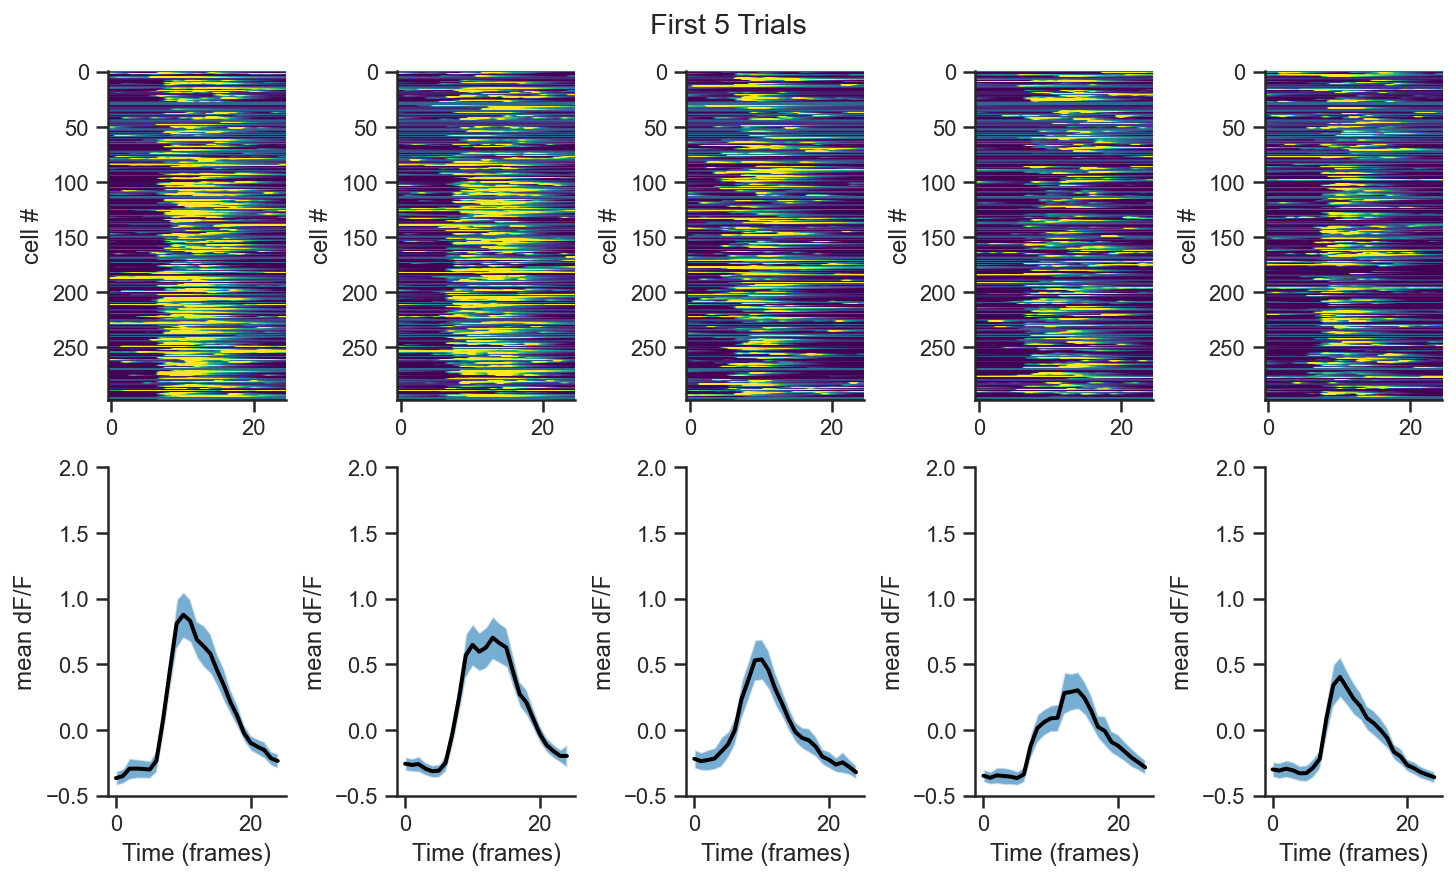

In [5]:
ncol=5
f, axes = plt.subplots(2,ncol, figsize=(10,6))
axes = axes.ravel()

for i,ax in enumerate(axes[0:5]):
    ax.set_ylabel('cell #')
    ax.imshow(traces[i,:,:], aspect='auto', vmin=-.5, vmax=1)
    #f.colorbar()

for i,ax in enumerate(axes[5:11]):
#     ax.plot(np.mean(traces[i,:,:],axis =0))
    mean_traces_ci(traces[i,:,:], ax=ax)
    ax.set_ylim(-0.5,2)
    ax.set_ylabel('mean dF/F')
    ax.set_xlabel('Time (frames)')
    
plt.suptitle('First 5 Trials')